# Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1 ảnh là 1 dòng gồm n cột
X = np.load('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/ex3_X.npy')
y = np.load('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/ex3_Y.npy')

m, n = X.shape
print(m,n)

5000 400


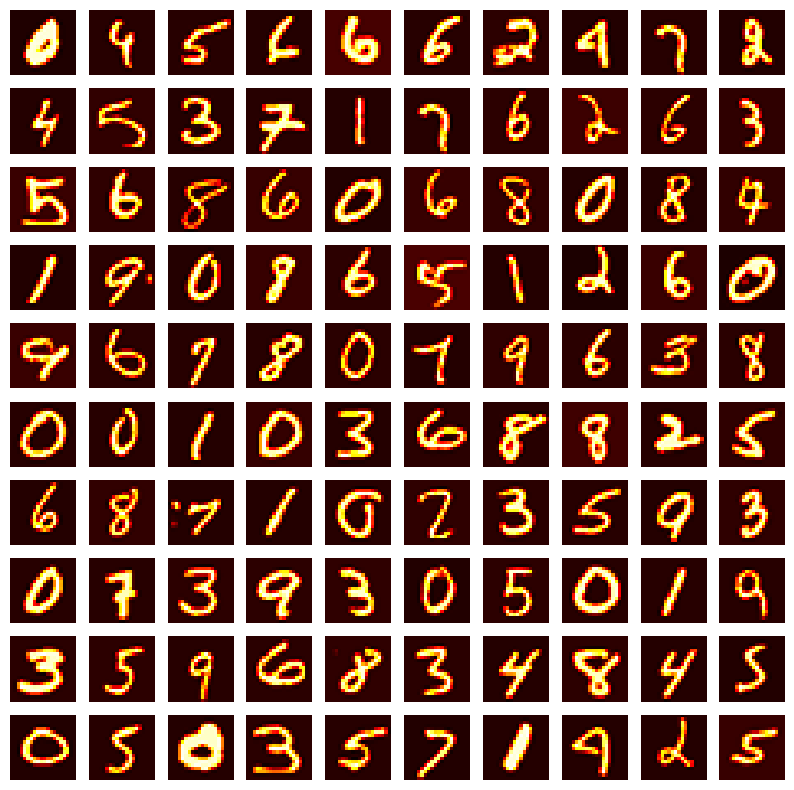

In [ ]:
#Draw image
import matplotlib.image as mpimg

fig, axis = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axis[i,j].imshow(X[np.random.randint(0,m+1),:].reshape(20,20,order='F'), cmap='hot')
    axis[i,j].axis('off')

plt.show()

In [ ]:
def compute_sigmoid_value(z):
  return 1 / (1 + np.exp(-np.array(z)))

In [ ]:
theta1 = np.load('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Theta1.npy')
print(theta1.shape)

theta2 = np.load('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Theta2.npy')
print(theta2.shape)

(25, 401)
(10, 26)


In [ ]:
input_units = 400
hidden_units = 25
number_of_class = 10

In [ ]:
def predict_by_using_NN(X, theta1, theta2, numberOfClass):
  m = X.shape[0]
  X = np.concatenate([np.ones((m,1)), X], axis=1)
  z2 = X.dot(theta1.T)
  a2 = compute_sigmoid_value(z2)
  a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
  z3 = a2.dot(theta2.T)
  a3 = compute_sigmoid_value(z3)
  return np.argmax(a3, axis=1)

In [ ]:
predicted_by_NN = predict_by_using_NN(X, theta1, theta2, number_of_class)
print('accuracy = ', np.mean(predicted_by_NN == y)*100)

accuracy =  97.52


## Implement Neural network using back propbagation algorithm

In [ ]:
def sigmoid_Gradent(z):
  gradient = np.zeros(z.shape)
  gradient = compute_sigmoid_value(z) * compute_sigmoid_value(1 - z)
  return gradient

In [ ]:
def compute_NN_cost_function(theta, number_of_input_unit, number_of_hidden_unit, number_of_output_unit, X, y, myLambda=0):
  theta1 = np.reshape(theta[:number_of_hidden_unit*(number_of_input_unit+1)],(number_of_hidden_unit, (number_of_input_unit+1)))
  theta2 = np.reshape(theta[number_of_hidden_unit*(number_of_input_unit+1):],(number_of_output_unit, (number_of_hidden_unit+1)))
  theta1_gradient = np.zeros(theta1.shape)
  theta2_gradient = np.zeros(theta2.shape)
  m = y.size
  J = 0

  a1 = np.concatenate([np.ones((m,1)), X], axis=1)
  a2 = compute_sigmoid_value(a1.dot(theta1.T))
  a2 = np.concatenate([np.ones((a2.shape[0],1)), a2], axis=1)
  a3 = compute_sigmoid_value(a2.dot(theta2.T))

  temp1 = theta1
  temp2 = theta2

  y_matrix = y.reshape(-1)
  y_matrix = np.eye(number_of_output_unit)[y_matrix]

  regulation_term = (myLambda / (2*m)) * (np.sum(np.square(temp1[:,1:])) + np.sum(np.square(temp2[:,1:])))

  J = (-1/m) * np.sum((np.log(a3) * y_matrix) + np.log(1-a3)*(1-y_matrix)) + regulation_term

  error_delta_3 = a3 - y_matrix
  error_delta_2 = error_delta_3.dot(theta2)[:,1:] * sigmoid_Gradent(a1.dot(theta1.T))

  delta1 = error_delta_2.T.dot(a1)
  delta2 = error_delta_3.T.dot(a2)

  theta1_gradient = (1/m) * delta1
  theta1_gradient[:,1:] = theta1_gradient[:,1:] + (myLambda/m)*theta1[:,1:]

  theta2_gradient = (1/m) * delta2
  theta2_gradient[:,1:] = theta2_gradient[:,1:] + (myLambda/m)*theta2[:,1:]

  gradient = np.concatenate([theta1_gradient.ravel(), theta2_gradient.ravel()])
  return J, gradient

In [ ]:
theta_all = np.concatenate([theta1.ravel(), theta2.ravel()])
myLambda = 0
J , gradient = compute_NN_cost_function(theta_all, 400, 25, 10, X, y)
print(f'Cost value = {J}')

Cost value = 0.2876291651613189


In [ ]:
def random_weights(s_in, s_out, epsilon_init=0.012):
  weight = np.zeros((s_out, s_in + 1))
  weight = np.random.rand(s_out, 1 + s_in) * (2 * epsilon_init) - epsilon_init
  return weight

In [ ]:
intializeTheta1 = random_weights(input_units, hidden_units)
intializeTheta2 = random_weights(hidden_units, number_of_class)

intializeTheta = np.concatenate([intializeTheta1.ravel(), intializeTheta2.ravel()])

In [ ]:
from scipy import optimize

In [ ]:
options = {'maxiter': 300}

myLambda = 1

costFunction = lambda p: compute_NN_cost_function(p, input_units, hidden_units, number_of_class, X, y, myLambda)

In [ ]:
result = optimize.minimize(costFunction, intializeTheta, jac=True, method='TNC', options=options)

<ipython-input-22-c3231dfee656>:1: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  result = optimize.minimize(costFunction, intializeTheta, jac=True, method='TNC', options=options)


In [ ]:
print(result.x)

[-3.83569042e-01  6.46596465e-04 -6.45621530e-04 ... -1.25621056e-01
  1.87410889e+00 -3.48319863e+00]


In [ ]:
theta_result = result.x
theta1 = np.reshape(theta_result[:hidden_units*(input_units+1)],(hidden_units, (input_units+1)))
theta2 = np.reshape(theta_result[hidden_units*(input_units+1):],(number_of_class, (hidden_units+1)))

In [ ]:
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [ ]:
predictedByNN = predict_by_using_NN(X, theta1, theta2, 10)
print('accuracy = ', np.mean(predictedByNN == y)*100)

accuracy =  99.33999999999999


## Bias and Variance

In [ ]:
from scipy.io import loadmat

In [ ]:
%matplotlib inline

In [ ]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
dataset = loadmat('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/ex5data1.mat')
X, y = dataset['X'], dataset['y'][:,0]
X_test, y_test = dataset['Xtest'], dataset['ytest'][:,0]
X_val, y_val = dataset['Xval'], dataset['yval'][:,0]
m = y.size

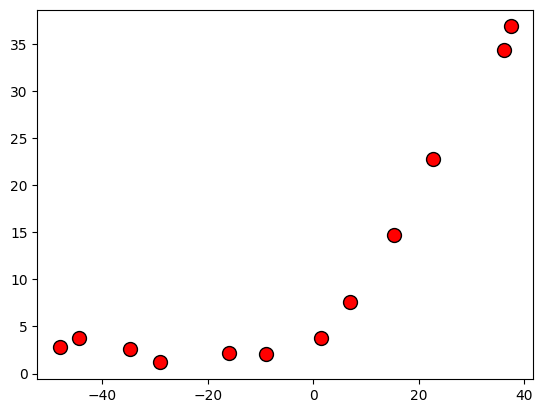

In [ ]:
plt.plot(X,y, 'ro', ms=10, mec='k', mew=1)

In [ ]:
#Implement a function to calculate linear regression cost
def compute_Linear_Regression_cost(X, y, theta, my_lambda=0):
  m = y.size
  J = 0
  grad = np.zeros(theta.shape)
  #...
  h = X.dot(theta)
  J = (1/(2*m)) * np.sum(np.square(h -y)) + (my_lambda/(2*m) * np.sum(np.square(theta[1:])))
  grad = (1/m)*(h-y).dot(X)
  grad[1:] = grad[1:] + (my_lambda/m)*theta[1:]
  return J, grad

In [ ]:
def train_by_Linear(compute_Linear_Regression_cost,X ,y, my_lambda, max_iteration):
  initTheta = np.zeros(X.shape[1])
  J = lambda tt: compute_Linear_Regression_cost(X, y, tt, my_lambda)
  options = {'maxiter': max_iteration}
  result = optimize.minimize(J, initTheta, jac=True, method='TNC', options=options)
  return result.x

In [ ]:
X_new = np.concatenate([np.ones((m,1)), X], axis=1)
theta = train_by_Linear(compute_Linear_Regression_cost, X_new, y, 0, 200)
print(theta)

[13.08790351  0.36777923]


<ipython-input-38-a62db7114e14>:5: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  result = optimize.minimize(J, initTheta, jac=True, method='TNC', options=options)


- Draw the Line function after getting the theta

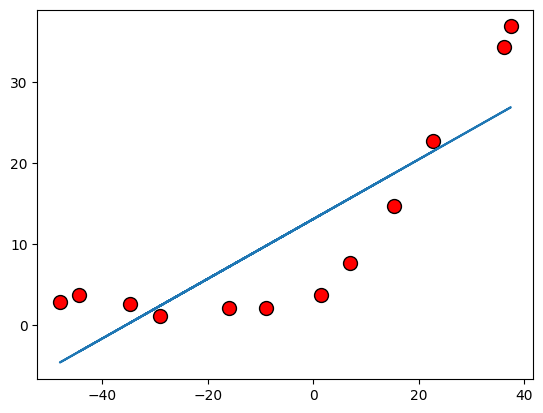

In [ ]:
plt.plot(X,y, 'ro', ms=10, mec='k', mew=1)
plt.plot(X, np.dot(X_new,theta), ms=10, mec='k', mew=1)
plt.show()

In [ ]:
def visualize_cost_train_and_validation(X, y, Xval, yval, myLambda):
  m = y.size
  J_train = np.zeros(m)
  J_val = np.zeros(m)

  for i in range(1, m+1):
    theta = train_by_Linear(compute_Linear_Regression_cost, X[:i], y[:i], 0, 200)
    J_train[i-1], _ = compute_Linear_Regression_cost(X[:i], y[:i], theta, 0)
    J_val[i-1], _ = compute_Linear_Regression_cost(Xval, yval, theta, 0)

  return J_train, J_val

In [ ]:
X_train = np.concatenate([np.ones((m,1)), X], axis=1)

X_validate = np.concatenate([np.ones((y_val.size,1)), X_val], axis=1)

In [ ]:
J_train, J_validate = visualize_cost_train_and_validation(X_train, y, X_validate, y_val, 0)
print(J_train)
print(J_validate)

[1.01769539e-18 3.46657146e-09 3.28659505e+00 2.84267769e+00
 1.31540488e+01 1.94439625e+01 2.00985217e+01 1.81728587e+01
 2.26094054e+01 2.32614616e+01 2.43172496e+01 2.23739065e+01]
[205.12109571 110.30264058  45.01023132  48.36891083  35.86516473
  33.82996167  31.97098567  30.8624462   31.1359981   28.93620747
  29.55143162  29.43381813]


<ipython-input-38-a62db7114e14>:5: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  result = optimize.minimize(J, initTheta, jac=True, method='TNC', options=options)


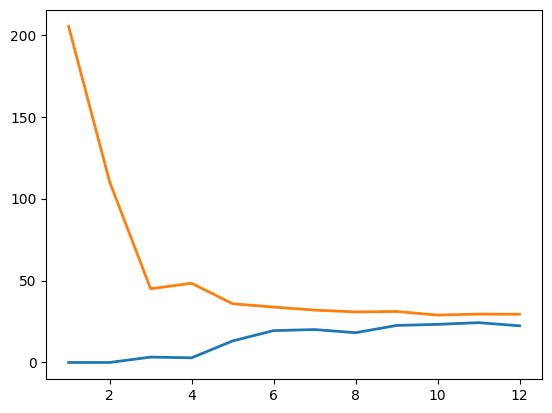

In [ ]:
plt.plot(np.arange(1,m+1), J_train, np.arange(1,m+1), J_validate, lw=2)
plt.show()

## Apply polynomial regression

In [ ]:
def increaseFeature(X, d):
  X_degree = np.zeros((X.shape[0], d))
  for i in range(d):
    X_degree[:,1] = X[:,0] ** [i+1]
  return X_degree

In [ ]:
def normalization(X):
  mean = np.mean(X, axis=0)
  X_norm = X - mean
  std = np.std(X_norm, axis=0, ddof=-1)
  X_norm /= std
  return X_norm, mean, std

In [ ]:
d = 3
X_3 = increaseFeature(X, d)
X_3, mean, std = normalization(X_3)
X_3 = np.concatenate([np.ones((m,1)), X_3], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [ ]:
X_3_test = increaseFeature(X_test, d)
X_3_test = (X_3_test - mean) / std
X_3_test = np.concatenate([np.ones((y_test.size,1)), X_3_test], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
X_3_val = increaseFeature(X_val, d)
X_3_val = (X_3_val - mean) / std
X_3_val = np.concatenate([np.ones((y_val.size,1)), X_3_val], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


- Homework \
Implement and draw the equation of the detected line \
Draw J_train and J_validate based on number of examples and lambda